# **Lab: Neural Networks**
---
## Exercise 2: Multi-Class Classification

The dataset we will be using is the famous MNIST.

The data was originally published by Professor Dr. Hans Hofmann
Institut f"ur Statistik und "Okonometrie
Universit"at Hamburg
FB Wirtschaftswissenschaften
Von-Melle-Park 5
2000 Hamburg 13

Each observation is an black and white image of size 28 by 28 representing a single hand-written digit.

This dataset is avalaible from Tensorflow: [MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist)

Our goal is to build a Neural Network model that can predict accurately the hand-written digit from an image.

The steps are:
1.   Launch Docker image
2.   Loading and Exploration of the Dataset
3.   Preparing the Dataset
4.   Defining the Architecture of the Multi-Layer Perceptron
5.   Training and Evaluation of the Model
6.   Analysing the Results
7.   Push changes


### 1. Launch Docker image

**[1.1]** Go to the folder you created previously

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cd /Users/anthonyso/Projects/adv_mla_2025

**[1.2]** Run the built Docker image

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
docker run  -dit --rm --name adv_mla_lab_8 -p 8888:8888 -v ~/Projects/adv_mla_2025/adv_mla_lab_8:/home/jovyan/work/ tensorflow-jupyter:latest

**[1.3]** Display last 50 lines of logs

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
docker logs --tail 50 adv_mla_lab_8

Syntax: docker logs [OPTIONS] CONTAINER

Options:

`--tail: Number of lines to show from the end of the logs`

Documentation: https://docs.docker.com/engine/reference/commandline/logs/

**[1.4]** Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.5]** Create a new git branch called `tf_multi_class`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git checkout -b tf_multi_class

**[1.6]** Create a subfolder `models/tf_multi_class`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
mkdir models/tf_multi_class

**[1.7]** Navigate the folder `notebooks` and create a new jupyter notebook called `2_tf_multiclass.ipynb`

### 2. Loading and Exploration of the Dataset

**[2.1]** Import the `mnist` class from tensorflow.keras.datasets

In [1]:
# Placeholder for student's code

In [2]:
# Solution
from tensorflow.keras.datasets import mnist

2025-11-10 08:05:02.231135: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 08:05:02.737111: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 08:05:02.743318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 08:05:06.944089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


**[2.2]** Load the dataset using the .load_data() method into 4 different variables: x_train, y_train, X_test and y_test

Note: The dataset from Tensorflow has already been split into training and testing sets. The output is 2 tuples each containing the features and target variable as numpy arrays for the training and testing sets.

In [3]:
# Placeholder for student's code

In [4]:
# Solution
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


**[2.3]** Print out dimensions of X_train and X_test numpy arrays using the [.shape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) method


In [5]:
# Placeholder for student's code

In [6]:
# Solution
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**[2.4]** Print out at the first image of X_train and its target value on y_train using Matplotlib [.imshow()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.imshow.html) and [.title()](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title)

In [7]:
# Placeholder for student's code

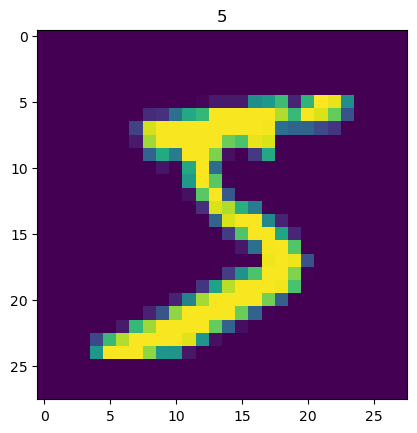

In [8]:
# Solution
import matplotlib.pyplot as plt

plt.title(y_train[0])
plt.imshow(X_train[0])
plt.show()

### 3.   Preparing the Dataset

**[3.1]** Normalise both the features for the training and testing sets.

Note: An image is composed of pixels with values from 0 to 255. We can therefore normalize it by dividing its pixels by the maximum value (ie 255). All pixel values will be then ranging from 0 to 1.

In [9]:
# Placeholder for student's code

In [10]:
# Solution
X_train = X_train / 255.0
X_test = X_test / 255.0

**[3.2]** Print the minimum and maximum values of the training and testing sets using .min()

In [11]:
# Placeholder for student's code

In [12]:
# Solution
print(X_train.min())
print(X_train.max())
print(X_test.min())
print(X_test.max())

0.0
1.0
0.0
1.0


### 4.   Defining the Architecture of the Multi-Layer Perceptron

**[4.1]** Import tensorflow and numpy

In [13]:
# Placeholder for student's code

In [14]:
# Solution
import tensorflow as tf
import numpy as np

**[4.2]** Then we will set the seeds for tensorflow and numpy in order to get reproducible results

In [15]:
# Placeholder for student's code

In [16]:
# Solution
tf.random.set_seed(42)

**[4.3]** Instantiate a [.Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and call it `model`

In [17]:
# Placeholder for student's code

In [18]:
# Solution
model = tf.keras.Sequential()

**[4.4]** Import the [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) and [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) classes

In [19]:
# Placeholder for student's code

In [20]:
# Solution
from tensorflow.keras.layers import Dense, Flatten

**[4.5]** Convert the input tensors from rank 2 to 1 before feeding them to a fully-connected layer using [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

In [21]:
# Placeholder for student's code

In [22]:
# Solution
flatten_layer = Flatten(input_shape=(28,28))

**[4.6]** Create a hidden layer of 256 fully connected neurins with ReLU as the activation function followed by another fully connected layer responsible of making final predictions

In [23]:
# Placeholder for student's code

In [24]:
# Solution
layer1 = Dense(256, activation='relu')
top_layer = Dense(10, activation='softmax')

**[4.7]** Assemble the different layers we just defined to create our first MLP. We will be using the [.add()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) method

In [25]:
# Placeholder for student's code

In [26]:
# Solution
model.add(flatten_layer)
model.add(layer1)
model.add(top_layer)

[4.8] Instantiate the [Adam()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) class, specify the learning rate to be 0.001 and save it into a variable called `optimizer`

In [27]:
# Placeholder for student's code

In [28]:
# Solution
optimizer = tf.keras.optimizers.Adam(0.001)

**[4.9]** Configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer and the metrics to be used

In [29]:
# Placeholder for student's code

In [30]:
# Solution
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**[4.10]** Print the model architecture with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

In [31]:
# Placeholder for student's code

In [32]:
# Solution
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. Training and Evaluation of the Model

**[5.1]** Train the model using the [.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method on the training set on 5 epochs and create a validation set (20%)

In [33]:
# Placeholder for student's code

In [34]:
# Solution
history = model.fit(X_train, y_train, epochs=5, validation_split = 0.2)

2025-11-10 08:05:27.849602: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
1500/1500 [==============================] - 16s 9ms/step - loss: 0.2522 - accuracy: 0.9280 - val_loss: 0.1339 - val_accuracy: 0.9611
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1037 - accuracy: 0.9696 - val_loss: 0.1048 - val_accuracy: 0.9680
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0686 - accuracy: 0.9794 - val_loss: 0.0846 - val_accuracy: 0.9734
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 5/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0837 - val_accuracy: 0.9742


**[5.2]** Evaluate the performance of this model on the testing set using [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [35]:
# Placeholder for student's code

In [36]:
# Solution
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9755


[0.07514851540327072, 0.9754999876022339]

### 6. Analysing the Results

**[6.1]** Plot the learning curve for accuracy score on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

In [37]:
# Placeholder for student's code

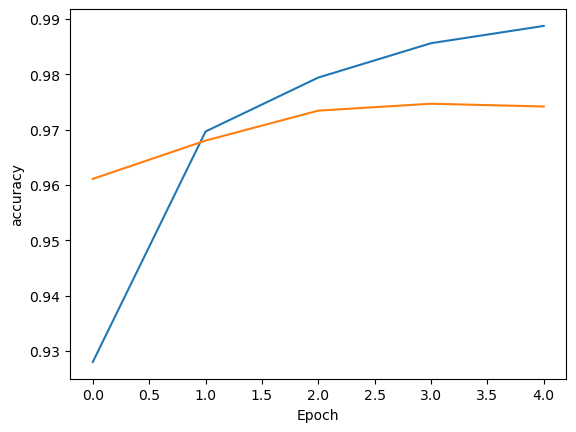

In [38]:
# Solution
plt.plot(history.history['accuracy'], label='MSE training')
plt.plot(history.history['val_accuracy'], label='MSE validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

**[6.2]** Using the trained model, print the predicted outcome on the first observation of the testing set by using the [.predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method

In [39]:
# Placeholder for student's code

In [40]:
# Solution
sparse_pred_test = model.predict(X_test)
sparse_pred_test[0]

313/313 [==============================] - 1s 3ms/step


array([1.0798515e-06, 2.5146824e-07, 1.5907848e-05, 2.5793656e-03,
       1.1471981e-10, 7.0480161e-07, 1.4607648e-11, 9.9713397e-01,
       1.4821242e-05, 2.5392455e-04], dtype=float32)

**[6.3]**  The output from the model is the probability for each class of the target variable. In order to get the final predicted value, we need to the [.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) method from numpy.

In [41]:
# Placeholder for student's code

In [42]:
# Solution
pred_test = np.argmax(sparse_pred_test, 1)
pred_test[0]

7

**[6.4]** Let's compare this prediction to the actual true value

In [43]:
# Placeholder for student's code

In [44]:
# Solution
y_test[0]

7

**[6.5]** Display the confusion matrix using the [.confusion_matrix()](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method from TensorFlow.

In [45]:
# Placeholder for student's code

In [46]:
# Solution
confusion_mat = tf.math.confusion_matrix(pred_test, y_test, num_classes=10)
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    3,    0,    1,    3,    3,    1,    3,    1],
       [   0, 1126,    0,    0,    0,    0,    3,    3,    0,    3],
       [   0,    4, 1011,    2,    2,    0,    0,   10,    5,    0],
       [   3,    1,    6, 1000,    2,   25,    3,    5,   28,    8],
       [   0,    0,    1,    0,  962,    2,    4,    0,    2,   11],
       [   2,    0,    0,    2,    0,  850,    4,    0,    3,    3],
       [   4,    2,    1,    0,    4,    7,  939,    0,    1,    0],
       [   2,    0,    4,    3,    3,    1,    0, 1003,    2,    8],
       [   1,    2,    6,    1,    0,    4,    2,    2,  925,    2],
       [   2,    0,    0,    2,    8,    0,    0,    4,    5,  973]],
      dtype=int32)>

**[6.6]** Save the entire model (architecture and weights)

In [47]:
# Placeholder for student's code (Python code)

In [48]:
# Solution
model.save('../models/tf_multi_class')

INFO:tensorflow:Assets written to: ../models/tf_multi_class/assets


INFO:tensorflow:Assets written to: ../models/tf_multi_class/assets


### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [49]:
# Placeholder for student's code (command line)

In [50]:
# Solution:
git add .

SyntaxError: invalid syntax (2810382083.py, line 2)

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git commit -m "second tf model"

**[7.3]** Push your snapshot to Github


In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict


**[7.5]** Check out to the master branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout master

**[7.6]** Pull the latest updates

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git pull

**[7.7]** Stop the Docker container

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
docker stop adv_mla_lab_8

Documentation: https://docs.docker.com/engine/reference/commandline/stop/